In [72]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("C:/Users/premanand.naik/OneDrive - Accenture/loan prediction/train.csv") #Reading the dataset in a dataframe using Pandas

In [73]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [74]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [75]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

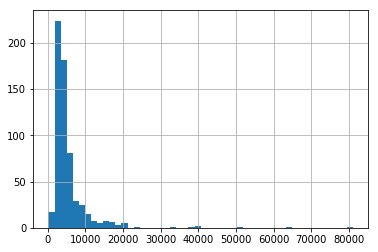

In [76]:
df['ApplicantIncome'].hist(bins=50)

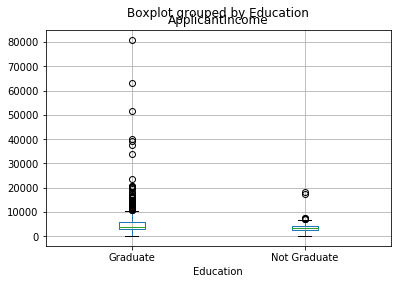

In [77]:
df.boxplot(column='ApplicantIncome', by = 'Education')

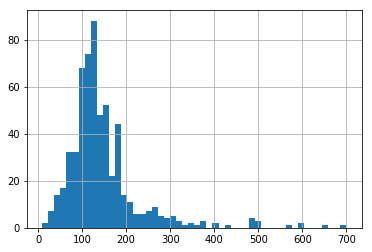

In [78]:
df['LoanAmount'].hist(bins=50)

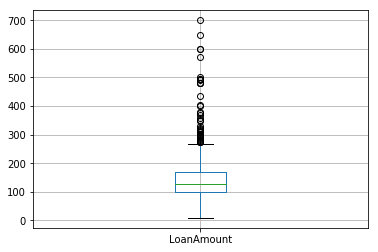

In [79]:
df.boxplot(column='LoanAmount')

In [80]:
df['Credit_History'].value_counts(ascending=True)

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [81]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


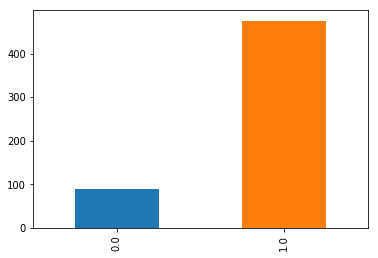

In [82]:
temp1.plot(kind='bar')

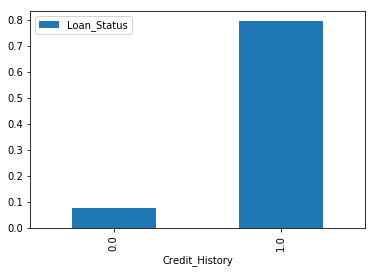

In [83]:
temp2.plot(kind = 'bar')

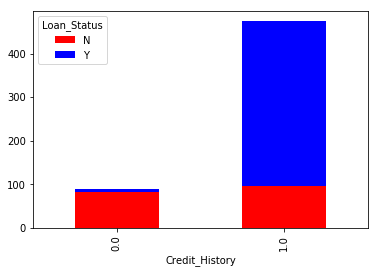

In [84]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [85]:
temp1 = df['Education'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Education','Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Education:') 
print (temp1)

print ('\nProbility of getting loan for each Education class:')
print (temp2)

Frequency Table for Education:
Not Graduate    134
Graduate        480
Name: Education, dtype: int64

Probility of getting loan for each Education class:
                             Loan_Status
Education    Credit_History             
Graduate     0.0                0.095238
             1.0                0.807895
Not Graduate 0.0                0.038462
             1.0                0.747368


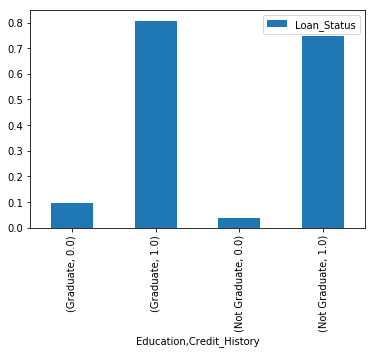

In [86]:
temp2.plot(kind = 'bar')

In [87]:
def getCombinedData():
    train = pd.read_csv("C:/Users/premanand.naik/OneDrive - Accenture/loan prediction/train.csv") 
    test = pd.read_csv("C:/Users/premanand.naik/OneDrive - Accenture/loan prediction/test.csv") 
    target = train['Loan_Status']
    train.drop('Loan_Status',1,inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)
    return combined

In [88]:
combined = getCombinedData()
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [89]:
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [90]:
combined['LoanAmount'].fillna(combined['LoanAmount'].mean(),inplace=True)

In [91]:
combined['Loan_Amount_Term'].fillna(combined['Loan_Amount_Term'].mean(),inplace=True)

In [92]:
combined['Credit_History'].fillna(combined['Credit_History'].mode()[0],inplace=True)

In [93]:
combined['Gender'].fillna(combined['Gender'].mode()[0],inplace=True)

In [94]:
combined['Married'].fillna(combined['Married'].mode()[0],inplace=True)
combined['Dependents'].fillna(combined['Dependents'].mode()[0],inplace=True)
combined['Self_Employed'].fillna(combined['Self_Employed'].mode()[0],inplace=True)

In [95]:
combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})

In [96]:
combined['Married'] = combined['Married'].map({'Yes':1,'No':0})

In [97]:
combined['NoDependents'] = combined['Dependents'].map(lambda d:1 if d=='0' else 0)
combined['Singleton'] = combined['Dependents'].map(lambda d:1 if d=='1' else 0)
combined['Small_Family'] = combined['Dependents'].map(lambda d:1 if d=='2' else 0)
combined['Large_Family'] = combined['Dependents'].map(lambda d:1 if d=='3+' else 0)
combined.drop('Dependents',axis=1,inplace=True)

In [98]:
combined['Education'] = combined['Education'].map({'Graduate':1,'Not Graduate':0})

In [99]:
combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1,'No':0})

In [100]:
combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
combined.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [101]:
combined['Debt_Income_Ratio'] = combined['Total_Income'] / combined['LoanAmount']

In [102]:
    combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    combined.drop('Loan_Amount_Term', axis=1, inplace=True)

In [103]:
combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda c: 1 if c==0 else 0)
combined['Credit_History_Good'] = combined['Credit_History'].map(lambda c: 1 if c==1 else 0)
combined.drop('Credit_History', axis=1, inplace=True)

In [104]:
property_dummies = pd.get_dummies(combined['Property_Area'], prefix='Property')
combined = pd.concat([combined, property_dummies], axis=1)
combined.drop('Property_Area', axis=1, inplace=True)

In [105]:
combined['LoanAmountLog'] = np.log(combined['LoanAmount'])

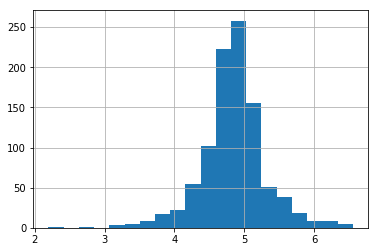

In [106]:
combined['LoanAmountLog'].hist(bins=20)

In [107]:
combined.drop('LoanAmount', axis=1, inplace=True)

In [108]:
combined['Total_IncomeLog'] = np.log(combined['Total_Income'])


In [109]:
combined.drop('Total_Income', axis=1, inplace=True)

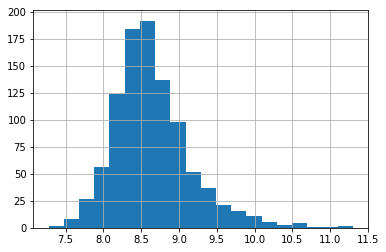

In [110]:
combined['Total_IncomeLog'].hist(bins=20)

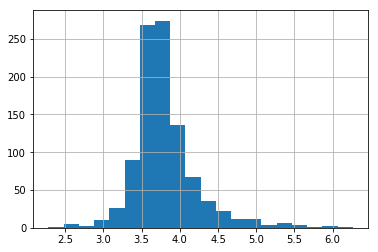

In [111]:
combined['Debt_Income_RatioLog'] = np.log(combined['Debt_Income_Ratio'])
combined.drop('Debt_Income_Ratio', axis=1, inplace=True)
combined['Debt_Income_RatioLog'].hist(bins=20)







In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [113]:
    targets = df['Loan_Status'].map({'Y':1,'N':0})
    train = combined.head(614)
    test = combined.iloc[614:]

In [114]:
clf  =  RandomForestClassifier (n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [115]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

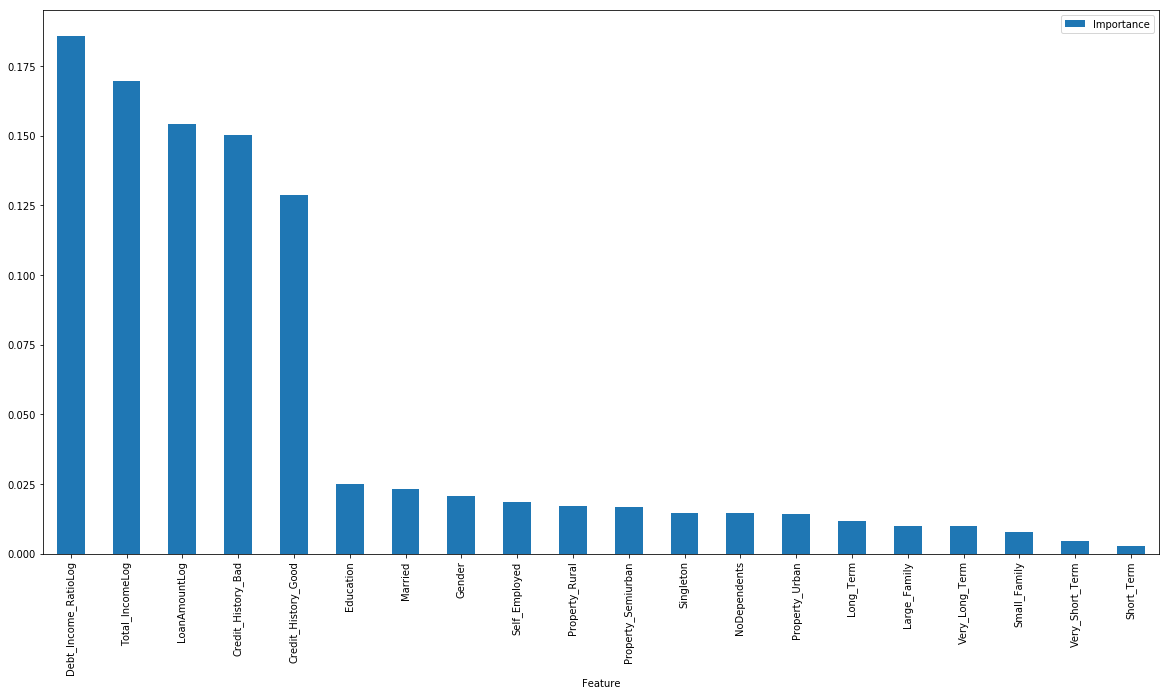

In [116]:
features.plot(kind='bar', figsize=(20, 10))

In [117]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(614, 5)

In [118]:
test_reduced = model.transform(test)
test_reduced.shape

(367, 5)

In [119]:
train.head()

,Gender,Married,Education,Self_Employed,NoDependents,Singleton,Small_Family,Large_Family,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Property_Rural,Property_Semiurban,Property_Urban,LoanAmountLog,Total_IncomeLog,Debt_Income_RatioLog
0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,4.959423,8.674026,3.714603
1,1,1,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,4.852030,8.714568,3.862537
2,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0,1,4.189655,8.006368,3.816713
3,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,4.787492,8.505323,3.717831
4,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,4.948760,8.699515,3.750755


In [120]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
#model.fit(train[['Total_IncomeLog','LoanAmountLog','Credit_History_Bad','Credit_History_Good','NoDependents','Singleton','Small_Family','Large_Family','Property_Rural','Property_Semiurban','Property_Urban']], targets)
model.fit(train_reduced, targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [121]:
xval = cross_val_score(model, train_reduced, targets, cv = 5, scoring='accuracy')
np.mean(xval)


0.7964833421470121

In [122]:
output =  model.predict(test_reduced).astype(int)
df_output  = pd.DataFrame()
aux = pd.read_csv('C:/Users/premanand.naik/OneDrive - Accenture/loan prediction/test.csv')
df_output['Loan_ID'] = aux['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)

In [123]:
df_output.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [124]:
df_output[['Loan_ID','Loan_Status']].to_csv('C:/Users/premanand.naik/OneDrive - Accenture/loan prediction/output.csv',index=False)